# EDA - Mobile-Driven Purchase Behavior Analysis 1

_An exploratory data analysis (EDA) focused on identifying user behavior patterns related to mobile purchasing, buyer confidence, demographics, impulsive buying influenced by discounts, and the synchronization between mobile usage habits and online shopping activity._

<img src="https://www.itexchangeweb.com/blog/wp-content/uploads/2017/12/image-blog.png" width="90%">

<div style="background-color:#cdcdcd;color:black;">

## 1.  Objetivo

</div>

El CEO de una empresa de ecommerce está preocupado por la baja retención de los compradores y usuarios. Se ha propuesto poner en marcha 3 lineas de actuación con los siguientes objetivos:
1. Hacer más atractivo el catálogo de productos ofertados.
2. Mejorar la usabilidad de la web.
3. Aumentar el ratio de usuarios que compran a través de su app y de la versión móvil de su web.

En relación al tercer punto, han visto que la proporción del uso móvil es menor de lo habitual en el sector, y quieren analizar los datos que ya tienen de sus usuarios para sacar patrones que ayuden al equipo de producto y de marketing a tomar decisiones sobre estrategias a implementar.

Por una parte, el equipo de marketing lanzó una aplicación independiente del ecommerce que utilizan tan sólo para recabar información de usuarios, además de para enviarles publicidad y promociones, con la que han logrado tener datos del uso de los dispositivos móviles de los usuarios.

Por otra parte, tienen el registro de las operaciones de compra del ecommerce durante un año, en el que tienen identificados aquellos que han comprado a través de dispositivos móviles y de los cuales conocen su edad, género, tipo de dispositivo, etc.

<div style="background-color:#cdcdcd;color:black;">

## 2. Hipótesis

</div>

- **Confianza del comprador** // Dataset 2<br>
Los usuarios que compran desde el móvil previamente han comprado desde Desktop

- **Confianza del comprador** // Dataset 2<br>
Hay relación entre plazos de entrega previos y la repetición de compra?

- **Perfil** // Dataset 2<br>
Hay diferencias de género o edad entre los compradores 'mobile' recurrentes?

- **Oferta** // Dataset 2<br>
Hay categorías de producto que destaquen para la primera compra móvil?

- **Compras impulsivas** // Dataset 2<br>
Tienen más efecto los descuentos en las compras móviles que en las Desktop?

- **Sincronía horaria de uso y compra** // Datasets 1 y 2 <br>
  ¿Se solapan las horas de mayor actividad en el móvil con las horas pico de compra online?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

<div style="background-color:#cdcdcd;color:black;">

## 3. Procesamiento y limpieza de Datasets

</div>

<div style="background-color:#909090;color:black;">

### 3.1. Dataset 1. Mobile Device Usage & User Behavior
</div>

   – Fuente: Kaggle  
   – Link: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


#### 3.1.1. Resumen:
El dataset contiene 700 muestras sobre patrones de uso de dispositivos móviles y clasifica a los usuarios en cinco niveles de comportamiento, desde uso ligero hasta extremo. Incluye datos como tiempo diario de uso de apps, horas con pantalla activa, consumo de batería y datos móviles, además de características demográficas como edad y género. Cada usuario está identificado con un ID único, modelo de dispositivo y sistema operativo (iOS o Android).

#### 3.1.2. Descripción de los Datos:
- **ID de usuario**: Identificador único de cada usuario.
- **Modelo del dispositivo**: Modelo del smartphone del usuario.
- **Sistema operativo**: El sistema operativo del dispositivo (iOS o Android).
- **Tiempo de uso de aplicaciones**: Tiempo diario dedicado a aplicaciones móviles, medido en minutos.
- **Tiempo con la pantalla encendida**: Promedio de horas diarias que la pantalla está activa.
- **Consumo de batería**: Consumo diario de batería en mAh.
- **Número de aplicaciones instaladas**: Total de aplicaciones disponibles en el dispositivo.
- **Uso de datos**: Consumo diario de datos móviles en megabytes.
- **Edad**: Edad del usuario.
- **Género**: Sexo del usuario (hombre o mujer).
- **Clase de comportamiento del usuario**: Clasificación del comportamiento del usuario según patrones de uso (1 a 5).

In [3]:
df_1 = pd.read_csv('data/user_behavior_dataset.csv')
df_1.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [5]:
df_1.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


#### 3.1.3 Comprobación de datos nulos o duplicados

Comprobamos si hay datos nulos en el Dataset 1 y si existen registrors duplicados.

In [6]:
#comprobamos si hay datos nulos
print('Valores nulos en el Dataset 1:\n',
      df_1.isnull().sum()
      )

Valores nulos en el Dataset 1:
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [7]:
#comprobando si hay datos duplicados
print('Valores duplicados en el Dataset 1:',
      df_1.duplicated().sum()
      )

Valores duplicados en el Dataset 1: 0


- No hay datos nulos en el Dataset 1, tal como hemos visto también previamente en info().
- No hay datos duplicados en el Dataset 1.

#### 3.1.4 Corrección de datos incorrectos y estandarización

**Tipos: Object → Category**<br>
Primero, comprobamos los tipos de las diferentes variables, de manera que podamos seleccionar aquellas de tipo 'object' y convertimos las que tienen pocos valores diferentes en variables de tipo 'category', ya que nos facilitará más adelante crear visualizaciones.

In [8]:
# comprobamos los tipos de las diferentes variables
df_1.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [9]:
# Columnas tipo object
objetos = df_1.select_dtypes(include='object')
print(objetos.info())

# Revisamos los valores únicos de los objetos
print('\nValores únicos:')
for col in objetos:
    print('\n', col, '→', df_1[col].nunique(), ':\n', df_1[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Device Model      700 non-null    object
 1   Operating System  700 non-null    object
 2   Gender            700 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB
None

Valores únicos:

 Device Model → 5 :
 ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']

 Operating System → 2 :
 ['Android' 'iOS']

 Gender → 2 :
 ['Male' 'Female']


In [10]:
#Convertimos los Object con pocos valores diferentes al tipo category
df_1['Operating System'] = df_1['Operating System'].astype('category')
df_1['Gender'] = df_1['Gender'].astype('category')

# revisamos los tipos de las columnas
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    category
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    category
 10  User Behavior Class         700 non-null    int64   
dtypes: category(2), float64(1), int64(7), object(1)
memory usage: 51.0+ KB


**Tipos Numéricos**<br>
Ahora comprobamos si alguna variable numérica tiene valores fuera de lo común. Para ello, utilizamos una visualización **boxplot** ya que muestran el rango intercuartílico (IQR), la mediana y los valores atípicos de un vistazo.

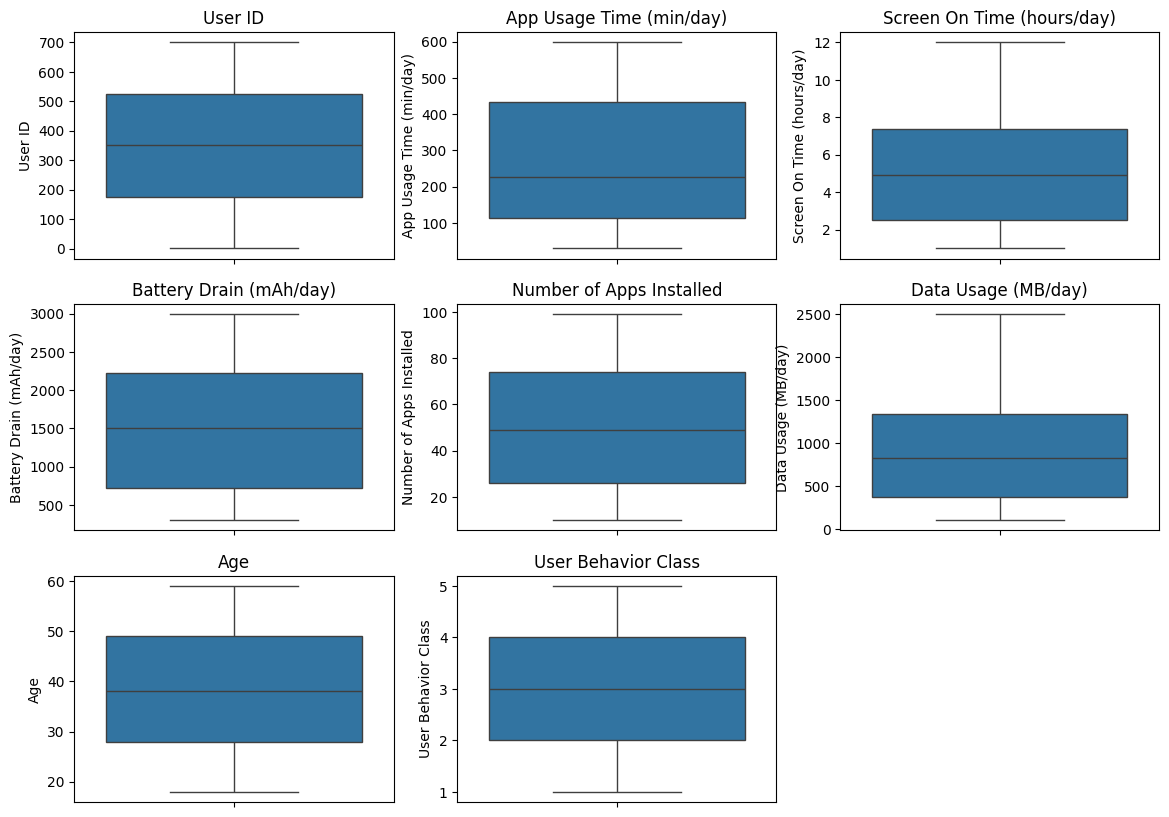

In [11]:
# Seleccionamos solo las columnas numéricas
numeric_cols = df_1.select_dtypes(include='number').columns

# Creamos un boxplot por cada variable numérica
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_1[col])
    plt.title(col)
    #plt.tight_layout()

plt.show()


#### Conclusiones para el Dataset 1:
No hay valores que se salgan de lo normal. No se aprecian errores ni hay outliers y todos los valores bastante razonables. Quizás en _Battery Drain_ y _Data Usage_ podríamos ver algunos datos muy altos, pero no creo que sean fuera de la norma.

Por lo tanto, considero que habría que mantener todos los registros.

<div style="background-color:#909090;color:black;">

### 3.2. Dataset 2: E-commerce Dataset
</div>

   – Fuente: Kaggle  
   – Link: https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset/data

#### 3.2.1. Resumen:
Este dataset contiene un año de datos de compras online de una empresa estadounidense, con detalles de cada pedido, como fechas, tiempos de entrega, perfil del cliente (género y login), así como información del producto (categoría, cantidad, descuentos) y aspectos financieros (ventas, beneficio, coste de envío). Quizás lo más importante, ya que me va a permitir utilizarlo con mis hipótesis: también diferencia las compras por tipo de dispositivo.

Hay más de 50.000 registros en el dataset, de los cuales casi 40.000 son usuarios únicos.
Se identifican 3.658 registros realizados desde dispositivos móviles, de 3.557 usuarios diferentes.

#### 3.2.2. Descripción de los Datos:
- **Order_Date**: Fecha en que se realizó el pedido.
- **Aging**: Tiempo desde la orden hasta la entrega del producto.
- **Customer_id**: Identificador único de cada cliente.
- **Gender**: Género del cliente.
- **Device_Type**: Dispositivo usado para realizar la compra (Web/Móvil).
- **Customer_Login_Type**: Tipo de inicio de sesión del cliente (Miembro, Invitado, etc.).
- **Product_Category**: Categoría del producto.
- **Product**: Producto.
- **Sales**: Importe total de ventas.
- **Quantity**: Cantidad de unidades del producto.
- **Discount**: Porcentaje de descuento aplicado.
- **Profit**: Beneficio.
- **Shipping_cost**: Coste de envío.
- **Order_Priority**: Prioridad del pedido (crítico, alta, etc.).
- **Payment_method**: Método de pago.

In [12]:
df_2 = pd.read_csv('data/E-commerce Dataset.csv')
df_2.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [13]:
print('Total registros:', len(df_2))
print('Usuarios únicos:', df_2['Customer_Id'].nunique())

print('\nRegistros mobile:', len(df_2[df_2['Device_Type'] == 'Mobile']))
print('Usuarios únicos + móvil:', df_2[df_2['Device_Type'] == 'Mobile']['Customer_Id'].nunique())

Total registros: 51290
Usuarios únicos: 38997

Registros mobile: 3658
Usuarios únicos + móvil: 3557


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [15]:
df_2.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


#### 3.2.3 Comprobación de datos nulos o duplicados

In [16]:
#comprobamos si hay datos nulos
nulos = df_2.isnull().sum()[df_2.isnull().sum() > 0]

# e imprimimos dónde se encuentran
print('Valores nulos en el Dataset 2:\n', nulos)

Valores nulos en el Dataset 2:
 Aging             1
Sales             1
Quantity          2
Discount          1
Shipping_Cost     1
Order_Priority    2
dtype: int64


In [17]:
#comprobando si hay datos duplicados
print('Valores duplicados en el Dataset 2:',
      df_2.duplicated().sum()
      )

Valores duplicados en el Dataset 2: 0


- Hay muy pocos valores nulos en el Dataset 2.
- No hay valores duplicados en el Dataset 2.

#### 3.2.4 Corrección de datos incorrectos y estandarización

**Tipos: Object → Category**<br>
Al igual que con el primer Dataset, para este Dataset 2 comprobamos los tipos de las diferentes variables, para convertir las de tipo 'object' con pocos valores diferentes en variables de tipo 'category'. Ésto nos facilitará el procesamiento y visualizaciones posteriores.

In [18]:
# comprobamos los tipos de las diferentes variables
df_2.dtypes

Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

In [19]:
# Columnas tipo object
objetos_2 = df_2.select_dtypes(include='object')
print(objetos_2.info())

# Revisamos los valores únicos de los objetos
print('\nValores únicos:')
for col in objetos_2:
    print('\n', col, '→', df_2[col].nunique(), ':\n', df_2[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order_Date           51290 non-null  object
 1   Time                 51290 non-null  object
 2   Gender               51290 non-null  object
 3   Device_Type          51290 non-null  object
 4   Customer_Login_type  51290 non-null  object
 5   Product_Category     51290 non-null  object
 6   Product              51290 non-null  object
 7   Order_Priority       51288 non-null  object
 8   Payment_method       51290 non-null  object
dtypes: object(9)
memory usage: 3.5+ MB
None

Valores únicos:

 Order_Date → 356 :
 ['2018-01-02' '2018-07-24' '2018-11-08' '2018-04-18' '2018-08-13'
 '2018-07-09' '2018-05-16' '2018-06-23' '2018-07-29' '2018-07-13'
 '2018-10-07' '2018-07-25' '2018-12-01' '2018-06-02' '2018-03-26'
 '2018-04-21' '2018-01-26' '2018-02-18' '2018-12-15' '2018-08-03'
 '201

Convertiré a tipo 'category' las siguientes columnas:
- **Gender**: 2 valores diferentes
- **Device_Type**: 2 valores diferentes
- **Customer_Login_type**: 4 valores diferentes
- **Product_Category**: 4 valores diferentes
- **Order_Priority**: 4 valores diferentes
- **Payment_method**: 5 valores diferentes

In [20]:
#Convertimos los Object con pocos valores diferentes al tipo category
df_2['Gender'] = df_2['Gender'].astype('category')
df_2['Device_Type'] = df_2['Device_Type'].astype('category')
df_2['Customer_Login_type'] = df_2['Customer_Login_type'].astype('category')
df_2['Product_Category'] = df_2['Product_Category'].astype('category')
df_2['Order_Priority'] = df_2['Order_Priority'].astype('category')
df_2['Payment_method'] = df_2['Payment_method'].astype('category')

# revisamos los tipos de las columnas
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Order_Date           51290 non-null  object  
 1   Time                 51290 non-null  object  
 2   Aging                51289 non-null  float64 
 3   Customer_Id          51290 non-null  int64   
 4   Gender               51290 non-null  category
 5   Device_Type          51290 non-null  category
 6   Customer_Login_type  51290 non-null  category
 7   Product_Category     51290 non-null  category
 8   Product              51290 non-null  object  
 9   Sales                51289 non-null  float64 
 10  Quantity             51288 non-null  float64 
 11  Discount             51289 non-null  float64 
 12  Profit               51290 non-null  float64 
 13  Shipping_Cost        51289 non-null  float64 
 14  Order_Priority       51288 non-null  category
 15  Payment_method     

**Tipos Numéricos**<br>
Ahora comprobamos si alguna variable numérica tiene valores fuera de lo común. Para ello, utilizamos una visualización **boxplot** ya que muestran el rango intercuartílico (IQR), la mediana y los valores atípicos de un vistazo.

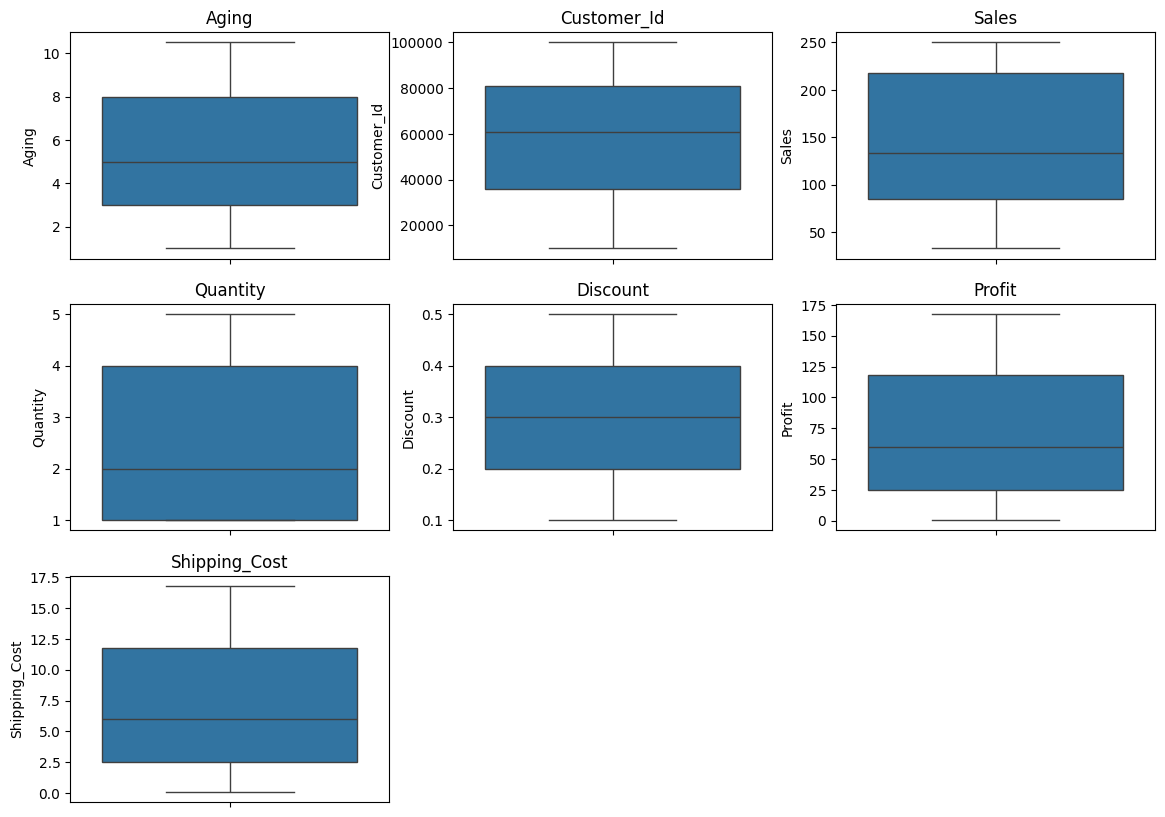

In [21]:
# Seleccionamos solo las columnas numéricas
numeric_cols_2 = df_2.select_dtypes(include='number').columns

# Creamos un boxplot por cada variable numérica
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols_2, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_2[col])
    plt.title(col)
    #plt.tight_layout()

plt.show()


**Tipos Fecha**<br>
Para poder analizar las fechas y horas del dataset es importante poder agruparlas por periodo (por día, mes, hora). Para ello convertiré estas columnas al tipo **datetime**. Ésto me permitirá hacer análisis de perioricidad y por horario.

Tal como veíamos con ``df_2.info()`` hay 2 columnas con este tipo de dato:

``0   Order_Date           51290 non-null  object`` >> Ejemplo de un dato: 2018-01-02

``1   Time                 51290 non-null  object`` >> Ejemplo de un dato: 10:56:33

In [22]:
# convierto Order_Date en tipo datetime
df_2['Order_Date'] = pd.to_datetime(df_2['Order_Date'], errors='coerce')

# convierto Time en tipo datetime (HH:MM:SS)
df_2['Time'] = pd.to_datetime(df_2['Time'], format='%H:%M:%S', errors='coerce').dt.time


In [23]:
# comprobamos los cambios
print(type(df_2['Order_Date'][0]))
print(type(df_2['Time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.time'>


#### 3.2.5 Eliminación de los registros con valores nulos

Considerando que existen muy pocos registros con valores nulos, voy a eliminarlos para dejar el Dataset sólo con registros con valores válidos.
- Aging:            1 Nan
- Sales:            1 Nan
- Quantity:         2 Nan
- Discount:         1 Nan
- Shipping_Cost:    1 Nan
- Order_Priority:   2 Nan

In [24]:
# elimino los registros que contengan algún dato nulo
df_2 = df_2.dropna()

# muestro la información del Dataframe 2 limpio
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51282 non-null  datetime64[ns]
 1   Time                 51282 non-null  object        
 2   Aging                51282 non-null  float64       
 3   Customer_Id          51282 non-null  int64         
 4   Gender               51282 non-null  category      
 5   Device_Type          51282 non-null  category      
 6   Customer_Login_type  51282 non-null  category      
 7   Product_Category     51282 non-null  category      
 8   Product              51282 non-null  object        
 9   Sales                51282 non-null  float64       
 10  Quantity             51282 non-null  float64       
 11  Discount             51282 non-null  float64       
 12  Profit               51282 non-null  float64       
 13  Shipping_Cost        51282 non-null 

#### Conclusiones para el Dataset 2:
No hay outliers que pudieran desvirtuar los datos, y tampoco parece que haya ningún dato erróneo.
Había algunos registros con valores nulos, que he eliminado, ya que son tan pocos que no alteran el análisis del Dataset.

<div style="background-color:#909090;color:black;">

### 3.3. Estandarización de columnas y valores de las categorías
</div>

In [25]:
# creo una función para eliminar espacios en blanco y otros caracteres especiales, y poner los nombres en minúsculas
def estandarizar_columnas(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('(', '', regex=False)
        .str.replace(')', '', regex=False)
        .str.replace('/', '_', regex=False)
    )
    return df

# Aplicamos a los dataframes
df_1 = estandarizar_columnas(df_1)
df_2 = estandarizar_columnas(df_2)

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   user_id                   700 non-null    int64   
 1   device_model              700 non-null    object  
 2   operating_system          700 non-null    category
 3   app_usage_time_min_day    700 non-null    int64   
 4   screen_on_time_hours_day  700 non-null    float64 
 5   battery_drain_mah_day     700 non-null    int64   
 6   number_of_apps_installed  700 non-null    int64   
 7   data_usage_mb_day         700 non-null    int64   
 8   age                       700 non-null    int64   
 9   gender                    700 non-null    category
 10  user_behavior_class       700 non-null    int64   
dtypes: category(2), float64(1), int64(7), object(1)
memory usage: 51.0+ KB


In [27]:
# creo una función para estandarizar los valores de las variables categóricas

# Columnas categóricas en df_1
cat_cols_df1 = ['device_model', 'operating_system', 'gender']

# Columnas categóricas en df_2
cat_cols_df2 = ['gender', 'device_type', 'customer_login_type', 'product_category', 'order_priority', 'payment_method']

# Función para limpiar valores de texto/categoría
def limpiar_categorias(df, columnas):
    for col in columnas:
        if df[col].dtype.name in ['object', 'category']:
            df[col] = df[col].str.strip().str.lower() # al aplicarle métodos de string se convierte en tipo object
            df[col] = df[col].astype('category') # volvemos a convertir a category (no es lo óptimo) :-/
    return df

# Aplicamos a los dos dataframes
df_1 = limpiar_categorias(df_1, cat_cols_df1)
df_2 = limpiar_categorias(df_2, cat_cols_df2)


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   user_id                   700 non-null    int64   
 1   device_model              700 non-null    category
 2   operating_system          700 non-null    category
 3   app_usage_time_min_day    700 non-null    int64   
 4   screen_on_time_hours_day  700 non-null    float64 
 5   battery_drain_mah_day     700 non-null    int64   
 6   number_of_apps_installed  700 non-null    int64   
 7   data_usage_mb_day         700 non-null    int64   
 8   age                       700 non-null    int64   
 9   gender                    700 non-null    category
 10  user_behavior_class       700 non-null    int64   
dtypes: category(3), float64(1), int64(7)
memory usage: 46.4 KB


In [28]:
df_1.head()

,user_id,device_model,operating_system,app_usage_time_min_day,screen_on_time_hours_day,battery_drain_mah_day,number_of_apps_installed,data_usage_mb_day,age,gender,user_behavior_class
0,1,google pixel 5,android,393,6.4,1872,67,1122,40,male,4
1,2,oneplus 9,android,268,4.7,1331,42,944,47,female,3
2,3,xiaomi mi 11,android,154,4.0,761,32,322,42,male,2
3,4,google pixel 5,android,239,4.8,1676,56,871,20,male,3
4,5,iphone 12,ios,187,4.3,1367,58,988,31,female,3


In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51282 non-null  datetime64[ns]
 1   time                 51282 non-null  object        
 2   aging                51282 non-null  float64       
 3   customer_id          51282 non-null  int64         
 4   gender               51282 non-null  category      
 5   device_type          51282 non-null  category      
 6   customer_login_type  51282 non-null  category      
 7   product_category     51282 non-null  category      
 8   product              51282 non-null  object        
 9   sales                51282 non-null  float64       
 10  quantity             51282 non-null  float64       
 11  discount             51282 non-null  float64       
 12  profit               51282 non-null  float64       
 13  shipping_cost        51282 non-null 

In [28]:
df_2.head()

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-02,10:56:33,8.0,37077,female,web,member,auto & accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,female,web,member,auto & accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,female,web,member,auto & accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,female,web,member,auto & accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,high,credit_card
4,2018-08-13,21:18:39,9.0,53639,female,web,member,auto & accessories,Tyre,250.0,1.0,0.3,160.0,16.0,critical,credit_card


<div style="background-color:#909090;color:black;">

### 3.4. Guardado de Datasets limpios
</div>

Una vez limpios y estandarizadas las variables de ambos Datasets, es hora de guardarlos como CSVs diferenciados de los originales.

In [ ]:
# Guardamos el Dataframe 1 como copia limpia del Dataset 1

df_1.to_csv('data/cleaned_user_behavior.csv', index=False)

In [30]:
# Guardamos el Dataframe 2 como copia limpia del Dataset 2
df_2.to_csv('data/cleaned_ecommerce.csv', index=False)